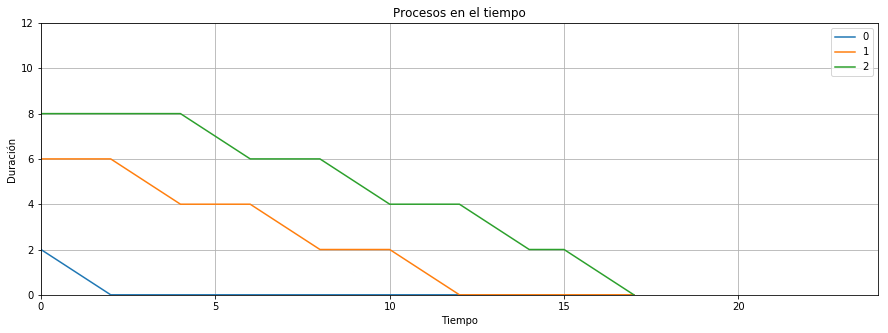

In [54]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

quantum=2
process=3
maxdura=12

def simulate(quantum,process,maxdura):
    processTime=[]
    for j in np.random.randint(1, high=maxdura, size=process):
        processTime.append([j])
    tiempo=0
    pid=0
    cuentaquantum=quantum
    valida=True
    while (valida):
        if cuentaquantum>0:
            if processTime[pid][-1]==0:
                if pid == len(processTime)-1:
                    pid=0
                    cuentaquantum=quantum
                else:
                    pid=pid+1
                    cuentaquantum=quantum
            if processTime[pid][-1]==0:
                processTime[pid].append(0)
            else:
                processTime[pid].append(processTime[pid][-1]-1)
            indexList=[y for y in range(len(processTime))]
            #Debug Line
            #print (indexList)
            indexList.remove(pid)
            #Debug Line
            #print (indexList)
            for s in indexList:
                processTime[s].append(processTime[s][-1])
            cuentaquantum=cuentaquantum - 1
                
        else:
            cuentaquantum=quantum
            if pid == len(processTime)-1:
                pid=0
            else:
                pid=pid+1
        
        valida=valida_procesos(processTime)
        tiempo=tiempo+1
        #Debug cicle
        #for k in range(len(processTime)):
            #print ('Proceso',k,' ',processTime[k],'tiempo =',tiempo,' Quatum =',cuentaquantum,' pid =',pid)
    
    #Plotting the processes times
    plt.figure(figsize=(15,5))
    for u in range(len(processTime)):
        plt.plot(processTime[u], label=u)
    plt.axis([0,tiempo,0,maxdura])
    plt.legend()
    plt.title('Procesos en el tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Duración')
    plt.grid()
    plt.show()
    
      
    
def valida_procesos(procesos):
    for i in procesos:
        if i[-1]!=0:
            result=True
            return result
    for o in procesos:
        if o[-1]==0:
            result=False
    return result

t=simulate(quantum,process,maxdura)
